#### <font color='black'> T-SNE Plots </font>
##### <font color='blue'> Purpose of the notebook is get the syntax right, not to get a working model of T-SNE </font>

In [131]:
import pandas as pd
import numpy as np

# load data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pd.read_csv(url, names=names)
df.to_csv("diabetes data")

In [132]:
from sklearn.model_selection import train_test_split

independent_features = df.drop(['class'], axis = 1).columns
#independent_features = ['plas', 'mass']
target_feature = ['class']

X_train, X_test, y_train, y_test = train_test_split(df[independent_features], df[target_feature], test_size=0.3, random_state=0)

In [135]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

n_samples, n_features = X_train.shape
perplexities = [5, 20, 50, 100, 250]
iterations = [250,500, 1000, 3000, 5000]
n_components = 2

red = y_train.values.ravel() == 0
green = y_train.values.ravel() == 1
X_train_scaled = pd.DataFrame(data = normalize(X_train, axis = 0), columns = X_train.columns)

##### <font color='blue'> Step 1: For a decently high number of iterations >1000, run t-sne for multiple perplexities </font>

Perplexity=5 in 3.4 sec
Perplexity=20 in 4 sec
Perplexity=50 in 3.3 sec
Perplexity=100 in 5.1 sec
Perplexity=250 in 4 sec


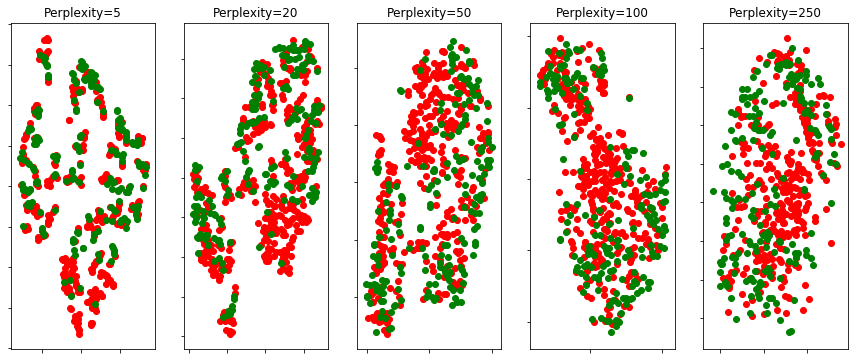

In [136]:
n_iterations = 1500
(fig, subplots) = plt.subplots(1, 5, figsize=(15, 6))
for i, perplexity in enumerate(perplexities):
    ax = subplots[i]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='pca',
                         random_state=0, perplexity=perplexity, n_iter = n_iterations)
    X_embedded = tsne.fit_transform(X_train_scaled)
    t1 = time()
    print("Perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    # Plot points in lower dimension space, class 0 - red points, class 1 - green points
    ax.scatter(X_embedded[red, 0], X_embedded[red, 1], c="r")
    ax.scatter(X_embedded[green, 0], X_embedded[green, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')

##### <font color='blue'> Step 2: Choose a perplexity, that distinguishes the classes better. </font>
##### <font color='black'> Keeping perplexity constant, play around with # of iterations, the pattern should stabilize as the iterations increase </font>

# Iterations=250 in 1.5 sec
# Iterations=500 in 2.5 sec
# Iterations=1000 in 4.8 sec
# Iterations=3000 in 5.7 sec
# Iterations=5000 in 5.7 sec


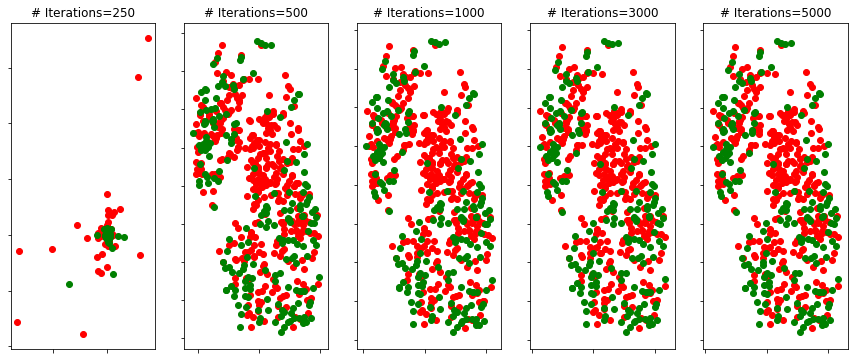

In [139]:
perplexity = 100
(fig, subplots) = plt.subplots(1, 5, figsize=(15, 6))


for i, n_iterations in enumerate(iterations):
    ax = subplots[i]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity, n_iter = n_iterations)
    X_embedded = tsne.fit_transform(X_train_scaled)
    t1 = time()
    print("# Iterations=%d in %.2g sec" % (n_iterations, t1 - t0))
    ax.set_title("# Iterations=%d" % n_iterations)
    # Plot points in lower dimension space, class 0 - red points, class 1 - green points
    ax.scatter(X_embedded[red, 0], X_embedded[red, 1], c="r")
    ax.scatter(X_embedded[green, 0], X_embedded[green, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')

##### <font color='blue'> Step 3: Once perplexity and iterations are chosen. Re-run the tsne plot multiple times for the given perplexity and iterations </font>
The idea is that the plot should not change much for multiple runs. If the plot changes for each run, it implies the perplexity and iterations are not stable

Perplexity = 100, # Iterations=1500 in 5.8 sec
Perplexity = 100, # Iterations=1500 in 5.7 sec
Perplexity = 100, # Iterations=1500 in 5.7 sec
Perplexity = 100, # Iterations=1500 in 5.7 sec
Perplexity = 100, # Iterations=1500 in 5.7 sec


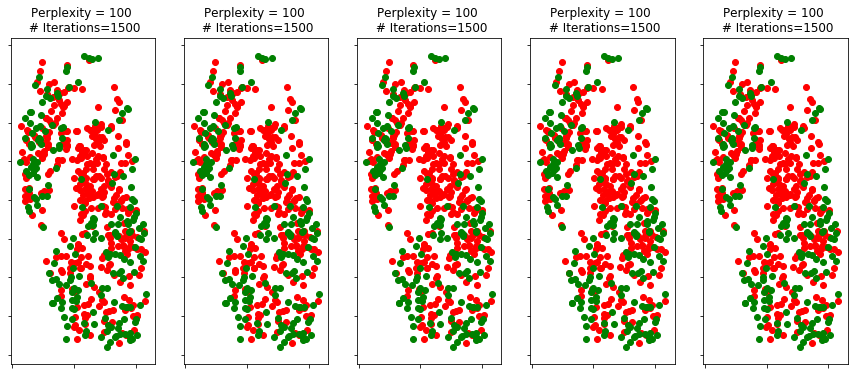

In [141]:
perplexity = 100
n_iterations = 1500
(fig, subplots) = plt.subplots(1, 5, figsize=(15, 6))

for i in range(0,5):
    ax = subplots[i]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity, n_iter = n_iterations)
    X_embedded = tsne.fit_transform(X_train_scaled)
    t1 = time()
    print("Perplexity = %d, # Iterations=%d in %.2g sec" % (perplexity, n_iterations, t1 - t0))
    ax.set_title("Perplexity = %d \n # Iterations=%d" % (perplexity, n_iterations))
    # Plot points in lower dimension space, class 0 - red points, class 1 - green points
    ax.scatter(X_embedded[red, 0], X_embedded[red, 1], c="r")
    ax.scatter(X_embedded[green, 0], X_embedded[green, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')